## Importing Data

In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
titanic_complete = pd.read_csv("titanic_test_complete.csv")
titanic_complete

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
326,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,0
327,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1
328,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,0
329,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1


## Histogram

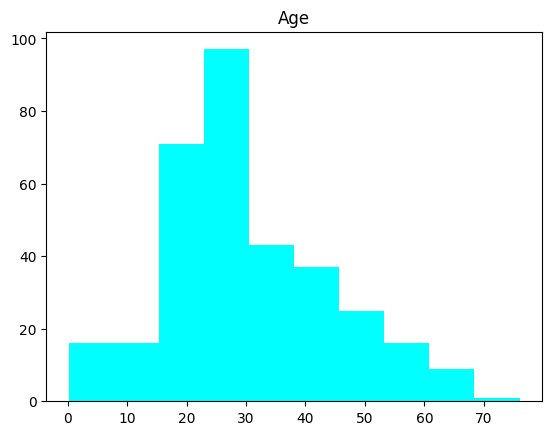

In [2]:
titanic_complete.hist("Age", grid = False, bins = 10, color = "cyan")
plt.show()

# Histogram visualizes the number of passengers across each age on the Titanic
# Passengers consisted mostly of younger individuals, those younger than 30
# Still a considerable number of passengers older than 30

## Pie Chart

In [3]:
Survival = titanic_complete["Survived"].tolist()
alive_dead = []
for i in range(len(Survival)):
    point = Survival[i]
    if point == 0:
        alive_dead.append("Dead")
    else:
        alive_dead.append("Alive")

titanic_complete["Status"] = alive_dead

print(titanic_complete)

# Converts 'Survived' column into proper categorical data
# Stores the results using a for loop into a new column titled 'Status'

     PassengerId  Pclass                                             Name  \
0            892       3                                 Kelly, Mr. James   
1            893       3                 Wilkes, Mrs. James (Ellen Needs)   
2            894       2                        Myles, Mr. Thomas Francis   
3            895       3                                 Wirz, Mr. Albert   
4            896       3     Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                              ...   
326         1301       3                        Peacock, Miss. Treasteall   
327         1303       1  Minahan, Mrs. William Edward (Lillian E Thorpe)   
328         1304       3                   Henriksson, Miss. Jenny Lovisa   
329         1306       1                     Oliva y Ocana, Dona. Fermina   
330         1307       3                     Saether, Mr. Simon Sivertsen   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarke

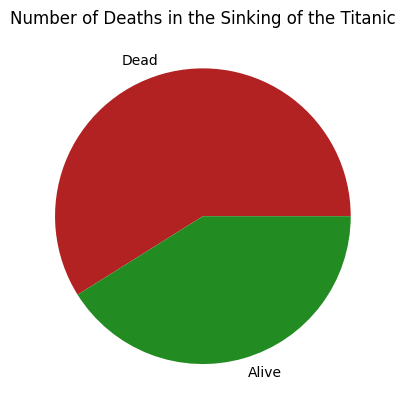

In [4]:
death = titanic_complete["Status"].value_counts()
# totals the number of passengers that are alive/dead
pie_colors = ["firebrick", "forestgreen"]
plt.pie(death, colors = pie_colors, labels = death.index)
plt.title("Number of Deaths in the Sinking of the Titanic")
plt.show()

# As expected most of the passengers on board died in the sinking of the titanic
# Most of these passengers are infered to be men, as they evacuated women and children first

## Scatterplot

In [5]:
best_fit_model = scipy.stats.linregress(titanic_complete["Fare"], titanic_complete["Age"])
print(best_fit_model)
# Creates linear regression model to find r-value and information for line of best fit

LinregressResult(slope=np.float64(0.07784570965776903), intercept=np.float64(26.990989212179905), rvalue=np.float64(0.3379315845519922), pvalue=np.float64(2.763371555528015e-10), stderr=np.float64(0.01195298395507097), intercept_stderr=np.float64(0.8797543759587443))


In [6]:
ages = titanic_complete["Age"]
slope = best_fit_model.slope
y_intercept = best_fit_model.intercept
best_fit = ages*slope+y_intercept
r_value = best_fit_model.rvalue
# Defines the r-value and allows it to be printed onto the graph with an annotation

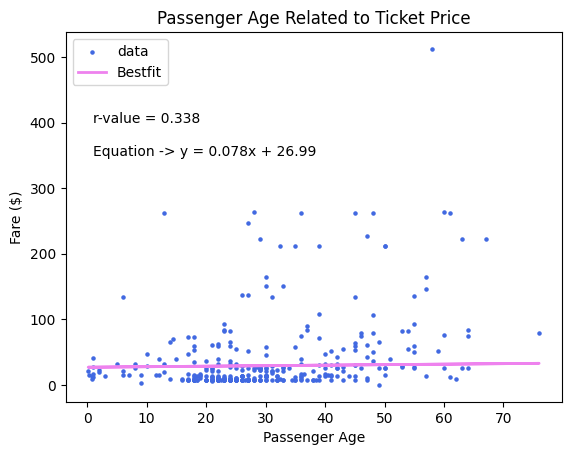

In [7]:
plt.figure()
plt.scatter(titanic_complete["Age"], titanic_complete["Fare"], s = 5, c = "royalblue", label = "data")
plt.plot(ages, best_fit, linewidth = 2, color = "violet", label = "Bestfit")
plt.legend(fontsize = 10, loc = "upper left")
plt.annotate("r-value = {:.3f}".format(r_value), (1, 400))
plt.annotate('Equation -> y = 0.078x + 26.99', (1, 350))

# .annotate allows text to be written on the graph to provide an extra layer of useful information

# Annotate Site -> https://stackoverflow.com/questions/59829077/how-to-display-r-squared-value-on-my-graph-in-python
# Equation Annotation -> https://matplotlib.org/stable/users/explain/text/annotations.html

plt.xlabel("Passenger Age")
plt.ylabel("Fare ($)")
plt.title("Passenger Age Related to Ticket Price")
plt.show()

## Other Figure(s)

In [8]:
titanic_complete_pt = pd.pivot_table(titanic_complete, values = "Survived", columns = ["Status", "Sex"],\
                                 index = ["Pclass"], aggfunc = "count")
print(titanic_complete_pt)

# Created pivot table to format data and use it in the creation of a bar graph

Status  Alive        Dead     
Sex    female male female male
Pclass                        
1          26   21     22   29
2          14   18     15   41
3          23   34     27   61


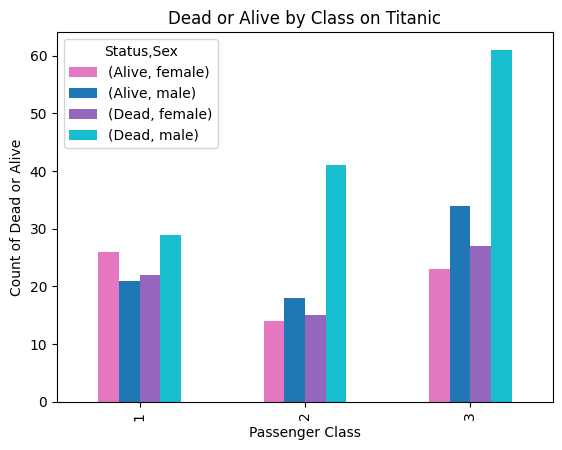

In [9]:
bar_colors = ["tab:pink", "tab:blue", "tab:purple", "tab:cyan"]
titanic_complete_pt.plot(kind = "bar", color = bar_colors)
plt.xlabel("Passenger Class")
plt.ylabel("Count of Dead or Alive")
plt.title("Dead or Alive by Class on Titanic")
plt.show()

## Contingency Table

In [10]:
titanic_complete_embarked = pd.pivot_table(titanic_complete, values = "Sex", columns = "Pclass", \
                                          index = ["Embarked"], aggfunc = "count")
print(titanic_complete_embarked)

Pclass     1   2    3
Embarked             
C         54   9   19
Q          1   3   18
S         43  76  108


In [11]:
c, p, dof, expected = scipy.stats.chi2_contingency(titanic_complete_embarked)
print("The P-Value is:", p)

# The number of passengers in each class compared to the number that embarked from each port
# is statistically significat, p < 0.05

The P-Value is: 3.283755661878131e-16


## Numerical Data Comparison

In [12]:
fare_class_pt = pd.pivot_table(titanic_complete, values = "Fare", columns = "Embarked",\
                                 index = ["Pclass"], aggfunc = "mean")
print(fare_class_pt)

Embarked           C          Q          S
Pclass                                    
1         113.160261  90.000000  84.456498
2          21.188878  11.462500  23.217105
3           9.715142   8.859261  12.955052


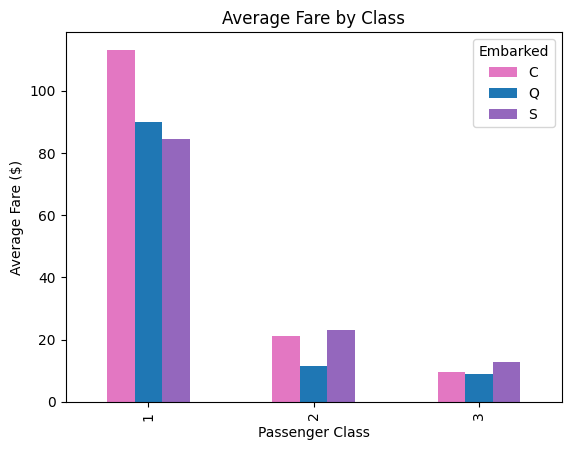

In [13]:
bar_colors = ["tab:pink", "tab:blue", "tab:purple",]
fare_class_pt.plot(kind = "bar", color = bar_colors)
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare ($)")
plt.title("Average Fare by Class")
plt.show()

# C -> Cherbourg, Q -> Queenstown, S -> Southampton
# The average cost per ticket on each class of the Titanic
# The average cost of 1st class tickets is greater than any other class
# Southampton tends to have a higher average ticket price among 2nd and 3rd class passengers